# **Lab 4: Working with JSON Format (22 points)**

#### **Dylan Watson**


---

**IMPORTANT**:
- Before starting the lab, save a copy to your google drive by navigating to `File > Save a copy in Drive` <br>
- Then rename the copied file `Lab#_LASTNAME_FIRSTNAME.ipynb` where # is the lab assignment number, LASTNAME is your last name, and FIRSTNAME is your first name.

<br>


**Instructions**: Complete the lab below.

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






The following packages are needed to complete the lab

In [1]:
install.packages("RCurl")    # package for working with urls
install.packages("RJSONIO")  # package for working with json files

Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'RCurl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RCurl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dylan\AppData\Local\R\win-library\4.3\00LOCK\RCurl\libs\x64\RCurl.dll to C:\Users\dylan\AppData\Local\R\win-library\4.3\RCurl\libs\x64\RCurl.dll: Permission denied"
Warning message:
"restored 'RCurl'"



The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\Rtmp8yOKmq\downloaded_packages


Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'RJSONIO' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RJSONIO'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dylan\AppData\Local\R\win-library\4.3\00LOCK\RJSONIO\libs\x64\RJSONIO.dll to C:\Users\dylan\AppData\Local\R\win-library\4.3\RJSONIO\libs\x64\RJSONIO.dll: Permission denied"
Warning message:
"restored 'RJSONIO'"



The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\Rtmp8yOKmq\downloaded_packages


In [2]:
library(RCurl)
library(RJSONIO)

<br>

---

<br>






####<font color=red>Task 1</font>  (2 points)

In this lab, we will work with data from the National Oceanic and Atmospheric Administration (NOAA). The data includes yearly departures from a baseline reference temperature from 1880 to 2016.

1. Load the JSON weather data from this [url](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/weather.json) into R as a list called `weather_list`.
2. Print the class of `weather_list`.


In [3]:
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/weather.json"
weather_list = fromJSON(url)
class(weather_list)

[1] "list"

<br>

---

<br>






####<font color=red>Task 2</font> (4 points)

1. Use the `names()` function to determine list contents. Print these names.

<br>

2. There should be a list item called `description`, which includes details about the data. From this list item (`weather_list$description`), identify the units of measurement. State your answer in a complete sentence.

<br>

3. Which number denotes a missing value in the dataset? Answer in a complete sentence.

<br>

4. Temperature departures are measured as the deviation from the average temperature across a base time period. What is the base period in this dataset? State in a complete sentence.

In [4]:
names(weather_list)
weather_list$description

[1] "description" "data"

$title
[1] "Global Land and Ocean Temperature Anomalies, January-December"

$units
[1] "Degrees Celsius"

$base_period
[1] "1901-2000"

$missing
[1] -999

The names of weather_list are description and data. The units of measurement under description are degrees celsius. The value -999 denotes a missing value. The base period for average temperature is the years 1901 to 2000.

<br>

---

<br>






####<font color=red>Task 3</font> (5 points)

1. Store the list item `data` as another variable called `weather_data`. Print the contents of `weather_data`.

<br>

2. Store the `names()` of `weather_data` as another variable called `weather_years`. Print the contents of `weather_years`.

<br>

3. Create a dataframe called `weather`, with one column called `year` for the year of the temperature departure observed and another column called `temp` for the tempertuare departure. Show the first few lines using `head()`.

<br>

4. What is the class of each column of the dataframe `weather`? State in a complete sentence.

<br>

5. Convert the columns of `weather` to a numeric class using `as.numeric()`. Show the first few lines using `head()`.

In [5]:
weather_data = weather_list$data
head(weather_data)

weather_years = names(weather_data)
head(weather_years)

weather = data.frame(year = weather_years, temp = weather_data)
head(weather)
class(weather$year)
class(weather$temp)

weather = data.frame(year = as.numeric(weather_years), temp = as.numeric(weather_data))
head(weather)
class(weather$year)
class(weather$temp)

1880    1881    1882    1883    1884    1885 
"-0.17" "-0.13" "-0.13" "-0.22" "-0.31" "-0.33"

[1] "1880" "1881" "1882" "1883" "1884" "1885"

,year,temp
,<chr>,<chr>
1880,1880,-0.17
1881,1881,-0.13
1882,1882,-0.13
1883,1883,-0.22
1884,1884,-0.31
1885,1885,-0.33


[1] "character"

[1] "character"

,year,temp
,<dbl>,<dbl>
1,1880,-0.17
2,1881,-0.13
3,1882,-0.13
4,1883,-0.22
5,1884,-0.31
6,1885,-0.33


[1] "numeric"

[1] "numeric"

The class of the columns of the first weather data frame are factors. After applying as.numeric to the cols they are now numeric.

<br>

---

<br>






####<font color=red>Task 4</font> (3 points)

1. What is the average temperature departure for observations before 1939 (` < 1939`)? State your answer in a complete sentence and be sure to include units of measurement. Round to the nearest 2 decimal places.

<br>

2. What is the average temperature departure for observations after 1980 (` > 1980`)? State your answer in a complete sentence and be sure to include units of measurement. Round to the nearest 2 decimal places.

<br>

3. Are the average temperature departures different? Explain your answer.

In [6]:
mean(weather$temp[weather$year < 1939])
mean(weather$temp[weather$year > 1980])

[1] -0.219661

[1] 0.5016667

The average temp departure for observations before 1939 is -0.22 degrees celsius. The average temp departure for observations after 1980 is 0.50 degrees celsius. I have not conducted a statistical test to determine if noise could account for any difference in mean temperature, however, at a glance it appears that the temperature departures for the two periods are significantly different and show a rise in temperature.

<br>

---

<br>






####<font color=red>Task 5</font> (3 points)

1. What is the standard deviation of temperature departures for observations between 1930 and 1950 (use `sd()`)? State your answer in a complete sentence and be sure to include units of measurement. Round to the nearest 2 decimal places.

<br>

2. What is the standard deviation of temperature departures for observations between 1880 and 1900 (use `sd()`)? State your answer in a complete sentence and be sure to include units of measurement. Round to the nearest 2 decimal places.

<br>

3. Are the standard deviations of the temperature departures different? Explain your answer based on your understanding of standard deviation.

In [7]:
sd(weather$temp[weather$year > 1930 & weather$year < 1950])
sd(weather$temp[weather$year > 1880 & weather$year < 1900])

[1] 0.1320553

[1] 0.08622017

The std. dev. of obs. between 1930 and 1950 is 0.13 deg. c. The std. dev. of obs. between 1880 and 1900 is 0.09 deg. c. There does appear to be a significant difference in standard deviation of temperature observations in those range of years alluding to a inrease in variance in the more recent time range.

<br>

---

<br>






####<font color=red>Task 6</font> (4 points)

1. Plot the data using the following script
```
plot(weather$year, weather$temp,
     xlab = "Year", ylab = "Temperature Departure",
     type = "l")
abline(h = 0, lty = 2)
```

<br>

Matching your observations to the plot:
2. Match your observations from Task 4 to the plot. Do they agree? Explain in complete sentences.

<br>

3. Match your observations from Task 5 to the plot. Do they agree? Explain in complete sentences.

<br>

4. What is the overall trend you observe from the plot? State your answer in a complete sentence.

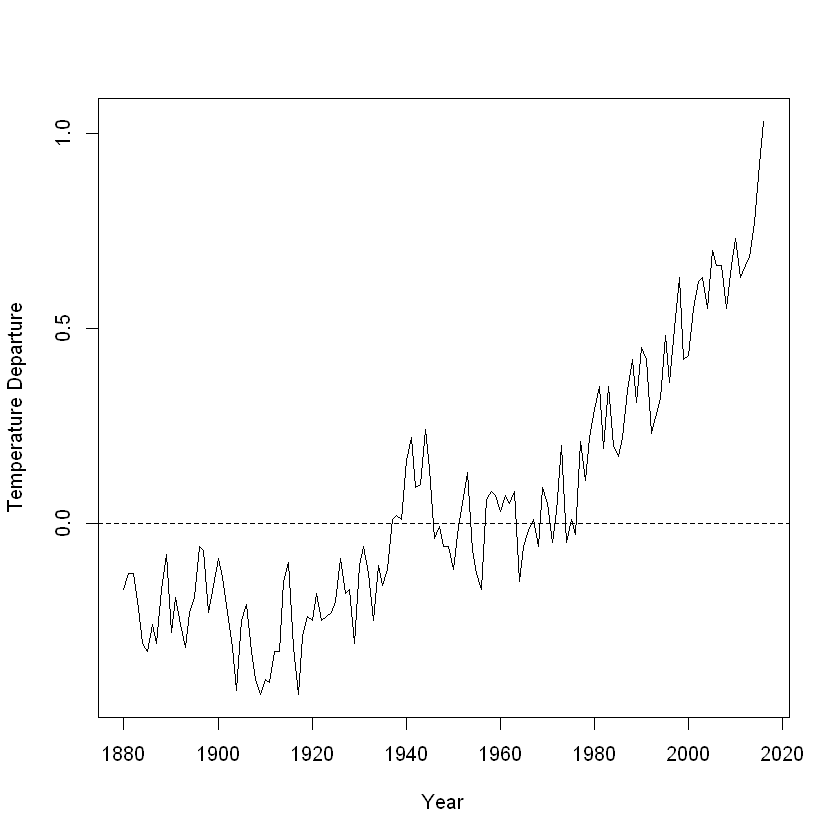

In [8]:
plot(weather$year, weather$temp,
     xlab = "Year", ylab = "Temperature Departure",
     type = "l")
abline(h = 0, lty = 2)

My observations from task 4 suggested a slightly lower mean temp departure for the years prior to 1939 with a mean of -0.22 deg. C and a slightly greater than mean temp departure for 1980 to present with a mean of 0.50 deg. C. This line graph of the temperature departures per year corroborates the findings of task 4. My findings from task 5 suggest a greater standard deviation of mean temperature departures for the more recent years of 1930 to 1950 than 1880 to 1900. This graph would also corroborate the findings of task 5 as the trend in temps for the 1880 to 1900 range are more conistent while the years 1930 to 1950 show the beginning of a steep increase in temp departures each year. The overall trend of the graph displays steady temperature deviations before 1930 with a slight increase year over year till 1970 where a sharp increase in temperature departures takes place through the present day.